In [40]:

import numpy as np 
import pandas as pd 

# Read and Explore Data

In [41]:
df = pd.read_csv('data.csv') #importing the dataset

In [42]:
df.head() #head of the dataset

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [43]:
df.shape #check the number of features

(6819, 96)

In [44]:
df.isnull().sum() #checking for null values

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [45]:
df.duplicated().sum()

0

There is no duplicate or null values in the data frame.

In [46]:
df.info() #checking the different datatypes of all features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

# Exploratory Data Analysis

In [47]:
#import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
#let us check the Target variable
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

Text(0.5, 1.0, 'Target feature - Bankrupt?')

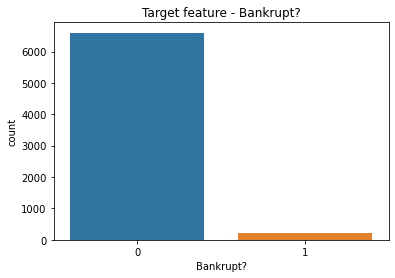

In [49]:
sns.countplot(x=df['Bankrupt?'])
plt.title('Target feature - Bankrupt?')

We notice an inbalance in our target value, we have to oversample it

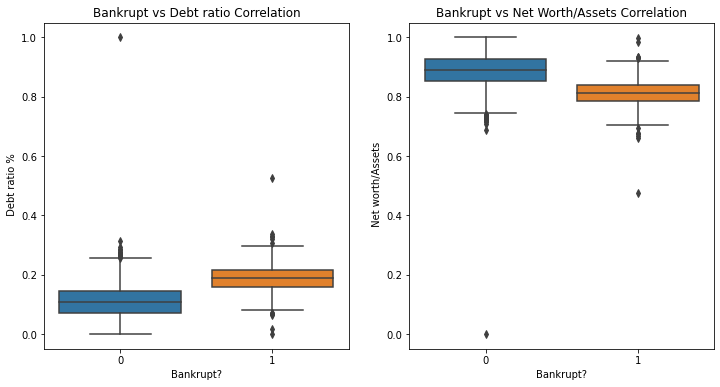

In [50]:
# Plotting interesting features

f, axes = plt.subplots(ncols=2, figsize=(12,6))

sns.boxplot(x='Bankrupt?', y=" Debt ratio %", data=df, ax=axes[0])
axes[0].set_title('Bankrupt vs Debt ratio Correlation')

sns.boxplot(x='Bankrupt?', y=" Net worth/Assets", data=df, ax=axes[1])  
axes[1].set_title('Bankrupt vs Net Worth/Assets Correlation') 

plt.show()

# Oversampling the Target value

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
X=df.drop(labels=['Bankrupt?'], axis=1)
y=df['Bankrupt?']

Oversampling the Target vaiable using SMOTE

In [53]:
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

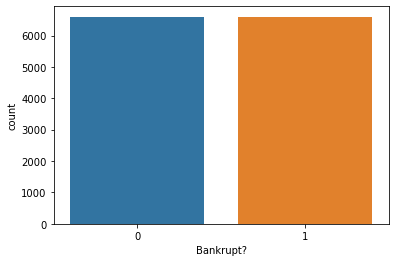

In [54]:
sns.countplot(x=y)

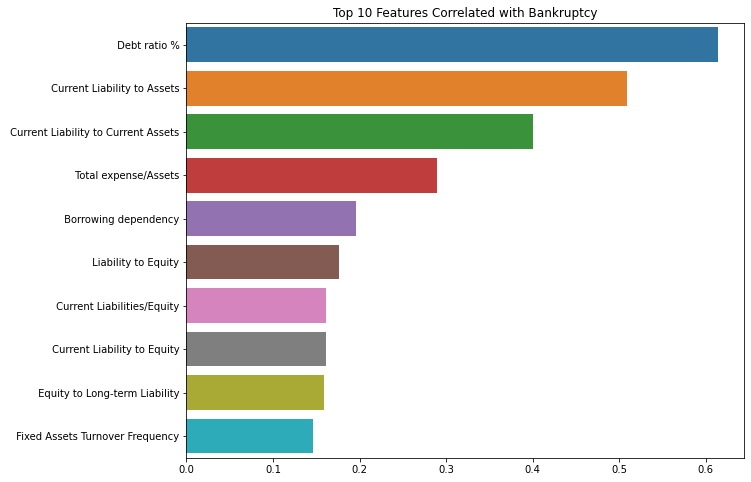

In [55]:
# Assuming `df` is your DataFrame after applying SMOTE and before feature scaling
X = df.drop(labels=['Bankrupt?'], axis=1)
y = df['Bankrupt?']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# Re-create the DataFrame with oversampled data for correlation calculation
df_oversampled = pd.DataFrame(X, columns=df.columns.drop('Bankrupt?'))
df_oversampled['Bankrupt?'] = y

# Calculate the correlation matrix
corr = df_oversampled.corr()

# Calculate correlations with the target variable
correlations = df_oversampled.corr()['Bankrupt?'].sort_values(ascending=False)

# Select top N features, excluding the target variable itself
top_features = correlations[1:11]  # Adjust N here, 10 as an example

# Plot
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 10 Features Correlated with Bankruptcy')
plt.show()


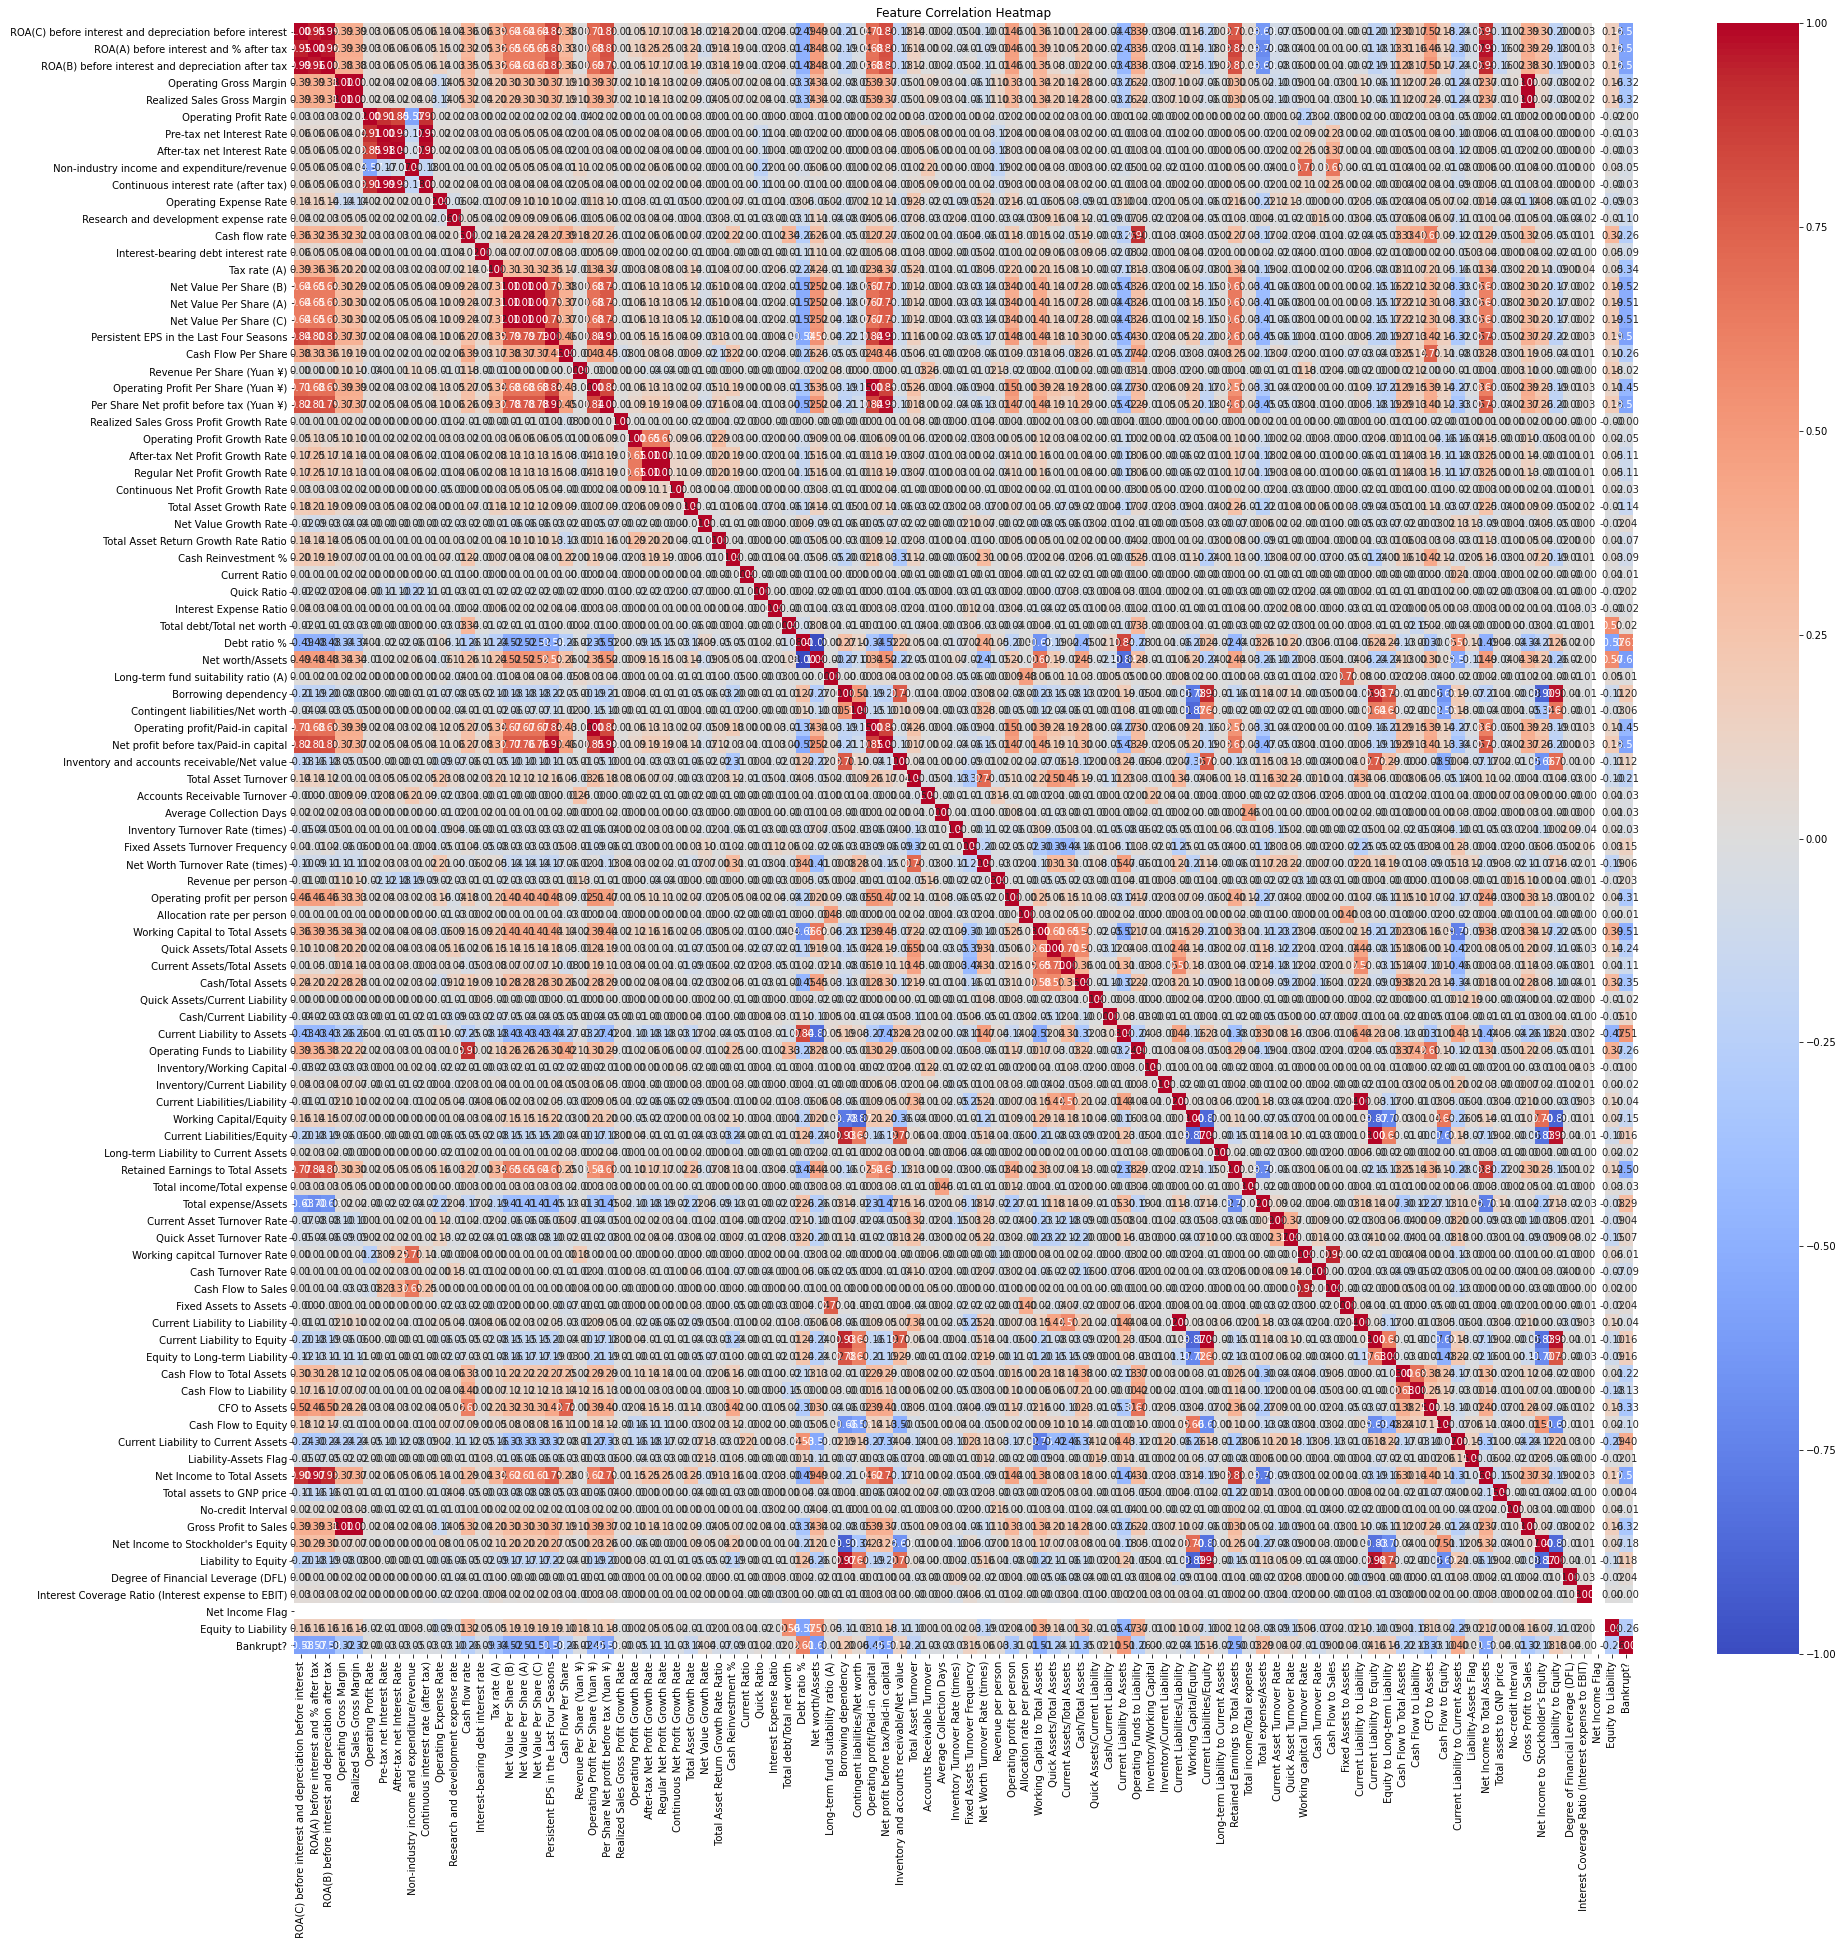

In [56]:
# Generate a heatmap
plt.figure(figsize=(30,30 ))  # Adjust the size as needed
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Feature Selection

Here we select 30 independent variables out of 96 variables.

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest


feature_selection=SelectKBest(f_classif,k=30).fit(X,y)

selected_features=X.columns[feature_selection.get_support()]



/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


# Standardize the Independent Variable

In [58]:
from sklearn.model_selection import train_test_split

scaler=StandardScaler()
X_scale=scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y,test_size=0.3)

# Algorithms

/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9030303030303031
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1956
           1       0.89      0.92      0.91      2004

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960



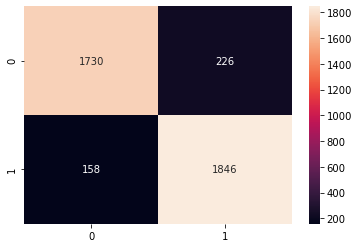

Accuracy: 0.9487373737373738
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      1956
           1       0.92      0.99      0.95      2004

    accuracy                           0.95      3960
   macro avg       0.95      0.95      0.95      3960
weighted avg       0.95      0.95      0.95      3960



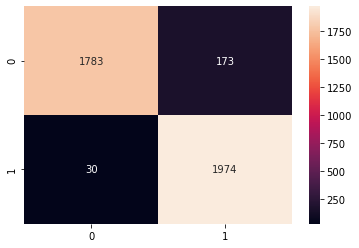

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    # Predictions
    y_pred = model.predict(X_test)
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    # Confusion Matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.show()

# Example usage with LogisticRegression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
train_and_evaluate(log_reg, X_train, y_train, X_test, y_test)

# Example usage with SVC
from sklearn.svm import SVC
svm_model = SVC()
train_and_evaluate(svm_model, X_train, y_train, X_test, y_test)

Accuracy: 0.9651515151515152
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1956
           1       0.94      1.00      0.97      2004

    accuracy                           0.97      3960
   macro avg       0.97      0.96      0.97      3960
weighted avg       0.97      0.97      0.97      3960



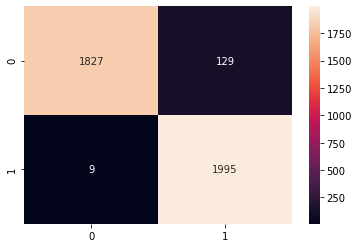

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=10, random_state=0)
train_and_evaluate(rf_model, X_train, y_train, X_test, y_test)